# Sports Leagues Revenue

In this notebook, we will grab a table from wikipedia and store the data in a `pandas` dataframe.

We will then use the dataframe data to create some more information, make some projections and plot some graphs. The last part includes using the `Matplotlib` library which we will look at in detail later in the course. 

Run the code in the code cells in order. There are 4 tasks (highlighted in green) for you to do.

## Grab Some Data from the Web
The next few code cells grab some data from the web (Wikipedia) and stores the contents of a particular table we want to analyze in a pandas dataframe.

In [1]:
# Import the requests library for making http requests.
import requests as r

# Create a header that says the request is coming form a browser-like agent (this is to prevent the website blocking our request).
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
}

# Make an http request to get the webpage with the following url.
url = "https://en.wikipedia.org/wiki/List_of_professional_sports_leagues_by_revenue"
page = r.get(url, headers = headers)

# Check that the request was successful. If so, the status code should be 200.
page.status_code

200

In [2]:
# Print the first few hundred characters of the webpage..
# The actual content of the page, which is HTML, is stored in the 'content' attribute of the page object.
print(page.content[0:200])

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pin'


In [2]:
# Import the pandas and numpy libraries.
import pandas as pd, numpy as np

# Use pd.read_html() to find all the tables in the webpage and put them in a list.
tables = pd.read_html(page.content)

# There should be 13 tables in this web page. We want the fifth one (index == 4).
# We will store a copy of this table in a dataframe called wp (for wind power).
sp = tables[0].copy()
sp

,Rank,League,Sport,Country(ies),Season,Tier level,Teams[a],Mat­ches/ games/ events,Rev. (€ mil),Rev. / team (€ mil),Rev. / match (€ thou­sands),Ref.
0,1,National Football League (NFL),American football,United States,2024,1,32,285,"19,142[b]",598.0,67165.0,[1]
1,2,Major League Baseball (MLB),Baseball,United States Canada,2024,1,30,2472,"11,037[c]",368.0,4465.0,[2]
2,3,National Basketball Association (NBA),Basketball,United States Canada,2024–25,1,30,1320,"10,606[d]",354.0,8034.0,[3]
3,4,Premier League (PL),Association football,England,2024–25,1,20,380,7742,387.0,18684.0,[4][5][6]
4,5,National Hockey League (NHL),Ice hockey,Canada United States,2024–25,1,32,1400,"6,006[e]",189.0,4334.0,[7]
...,...,...,...,...,...,...,...,...,...,...,...,...
111,112,Primera B de Chile,Association football,Chile,2020,2,15[cb],218,26.92[cc],1.8,128.0,[55]
112,113,Ekstraliga,Speedway,Poland,2021,1,8,64,26.3[cd],3.3,471.0,[74]
113,114,League of Ireland Premier Division,Association football,Ireland Northern Ireland,2022,1,10,180,26,2.6,144.0,[20]
114,115,Campeonato Brasileiro Série C (Série C),Association football,Brazil,2020,3,20,206,25.2[ce],1.2,122.0,[55]


In [3]:
sp.rename(columns={'Rev. (€ mil)':"Revenue"}, inplace=True)

In [4]:
col = 8
rows = sp.shape[0]
for row in range(rows):
    sp.iloc[row, col] = float(sp.iloc[row, col].split('[')[0].replace(',', ''))

In [5]:
sp_top10 = sp.loc[0:9]
sp_top10

,Rank,League,Sport,Country(ies),Season,Tier level,Teams[a],Mat­ches/ games/ events,Revenue,Rev. / team (€ mil),Rev. / match (€ thou­sands),Ref.
0,1,National Football League (NFL),American football,United States,2024,1,32,285,19142.0,598.0,67165.0,[1]
1,2,Major League Baseball (MLB),Baseball,United States Canada,2024,1,30,2472,11037.0,368.0,4465.0,[2]
2,3,National Basketball Association (NBA),Basketball,United States Canada,2024–25,1,30,1320,10606.0,354.0,8034.0,[3]
3,4,Premier League (PL),Association football,England,2024–25,1,20,380,7742.0,387.0,18684.0,[4][5][6]
4,5,National Hockey League (NHL),Ice hockey,Canada United States,2024–25,1,32,1400,6006.0,189.0,4334.0,[7]
5,6,Campeonato Nacional de Liga de Primera Divisió...,Association football,Spain,2022–23,1,20,380,5240.0,262.0,13789.0,[8][9]
6,7,Fußball-Bundesliga (Bundesliga),Association football,Germany,2022–23,1,18,306,4452.0,247.0,14549.0,[10][6]
7,8,Lega Nazionale Professionisti Serie A (Serie A),Association football,Italy,2022–23,1,20,380,3618.0,181.0,9521.0,[11]
8,9,Championnat de France de football (Ligue 1),Association football,France Monaco,2022–23,1,20[f],380,2378.0,115.4,6258.0,[12]
9,10,Major League Soccer (MLS),Association football,United States Canada,2024,1,30[g],510,2233.0,77.0,4174.0,[13][14]


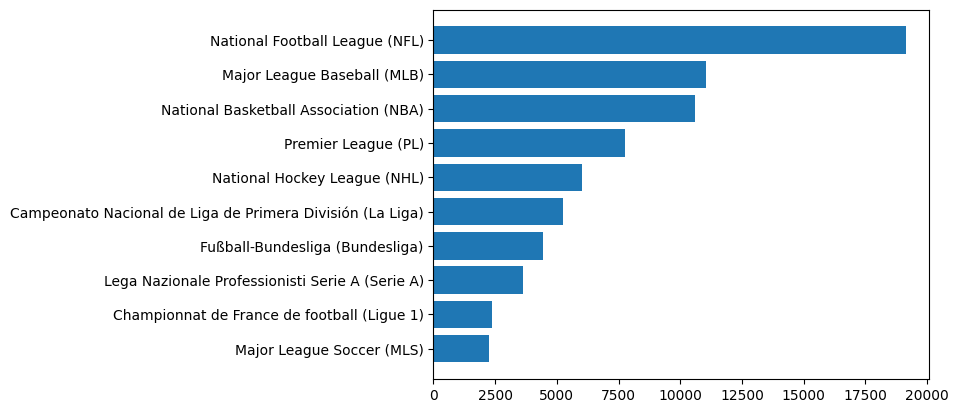

In [6]:
import matplotlib.pyplot as plt

leagues = sp_top10['League'][::-1]
revs = sp_top10["Revenue"][::-1]
plt.barh(leagues, revs)
plt.show()

In [7]:
print(revs.tolist())

[2233.0, 2378.0, 3618.0, 4452.0, 5240.0, 6006.0, 7742.0, 10606.0, 11037.0, 19142.0]


In [8]:
print(leagues.tolist())

['Major League Soccer (MLS)', 'Championnat de France de football (Ligue 1)', 'Lega Nazionale Professionisti Serie A (Serie A)', 'Fußball-Bundesliga (Bundesliga)', 'Campeonato Nacional de Liga de Primera División (La Liga)', 'National Hockey League (NHL)', 'Premier League (PL)', 'National Basketball Association (NBA)', 'Major League Baseball (MLB)', 'National Football League (NFL)']


In [60]:
sport_cats = sp['Sport'].unique()

In [61]:
sport_cats

array(['American football', 'Baseball', 'Basketball',
       'Association football', 'Ice hockey', 'Twenty20 cricket',
       'Australian rules football', 'Rugby league football',
       'Rugby union football', 'Canadian football', 'Handball', 'Kabaddi',
       'Speedway'], dtype=object)

In [62]:
revs = []
for cat in sport_cats:
    revs.append(sp[sp['Sport']==cat]['Revenue'].sum())
print(revs)
    

[19142.0, 13898.29, 12684.1, 41643.719999999994, 7062.400000000001, 2383.33, 837.0, 487.0, 1007.2, 143.0, 105.0, 29.46, 26.3]


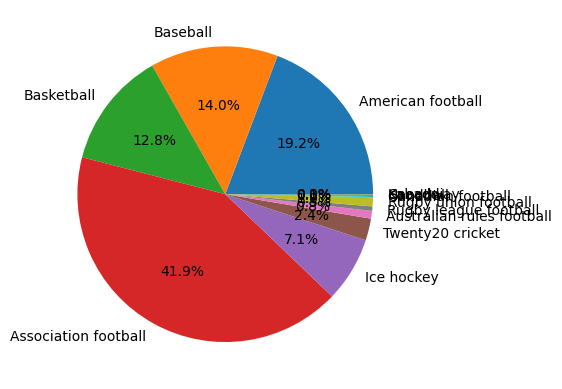

In [63]:
plt.pie(revs, labels=sport_cats, autopct='%1.1f%%')
plt.show()

In [81]:
r = revs[0:6]
r

[19142.0, 13898.29, 12684.1, 41643.719999999994, 7062.400000000001, 2383.33]

In [84]:
r_other = sum(revs[7:13])
r_other

1797.96

In [85]:
s = sport_cats[0:6].tolist()
s

['American football',
 'Baseball',
 'Basketball',
 'Association football',
 'Ice hockey',
 'Twenty20 cricket']

In [86]:
r.append(r_other)
s.append('Other')


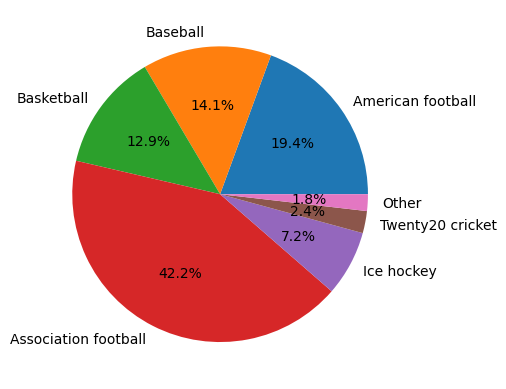

In [88]:
plt.pie(r, labels=s, autopct='%1.1f%%')
plt.show()

In [89]:
print(r)
print(s)

[19142.0, 13898.29, 12684.1, 41643.719999999994, 7062.400000000001, 2383.33, 1797.96]
['American football', 'Baseball', 'Basketball', 'Association football', 'Ice hockey', 'Twenty20 cricket', 'Other']


In [92]:
for i, rev in enumerate(r):
    r[i] = round(rev)

In [93]:
print(r)

[19142, 13898, 12684, 41644, 7062, 2383, 1798]
